In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.37            0.63            0.57            0.35            9.0939         


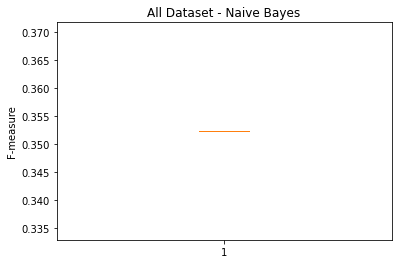

all_data          QDA                0.7             0.69            0.75            0.68            8.4337         


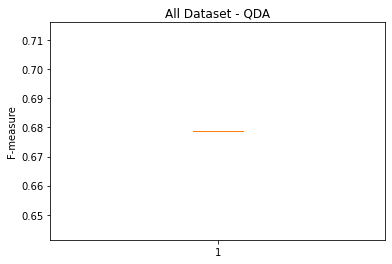

all_data          MLP                0.81            0.86            0.64            0.64            1602.5844      


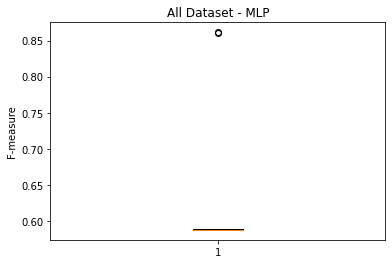

all_data          Random Forest      0.95            0.94            0.92            0.93            81.8678        


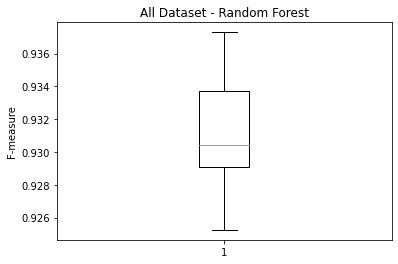

all_data          ID3                0.94            0.94            0.91            0.92            39.1745        


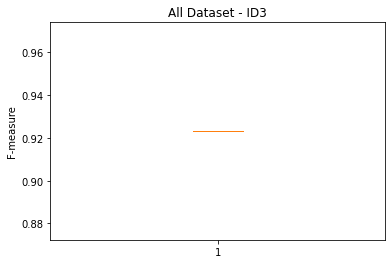

all_data          AdaBoost           0.95            0.95            0.93            0.94            475.4423       


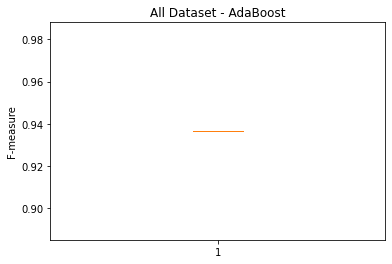

all_data          Nearest Neighbors  0.94            0.94            0.91            0.92            1378.3299      


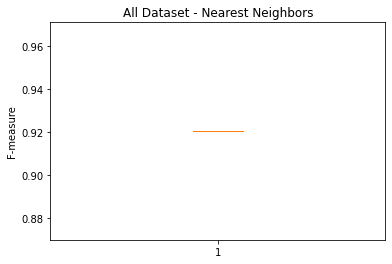

Mission accomplished!
Total operation time: =  36010.62157702446 seconds


In [2]:
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
import math

%matplotlib inline
warnings.filterwarnings("ignore")


def folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")


result = "/content/drive/MyDrive/ISU/results/results_Final.csv"
csv_files = ["all_data.csv"]
path = "/content/drive/MyDrive/ISU/"
repetition = 10


def folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")


folder_name = "/content/drive/MyDrive/ISU/results/"
folder(folder_name)
folder_name = "/content/drive/MyDrive/ISU/results/result_graph_Final/"
folder(folder_name)

usecols = ["Flow IAT Min", "Bwd Pkt Len Mean", "Fwd Pkt Len Std", "Fwd IAT Tot", "Bwd Pkt Len Std", "Flow Byts/s",
           "Flow IAT Max", "Flow Duration", "Flow IAT Mean", "Flow IAT Std", "Fwd Pkt Len Max", "Flow Pkts/s",
           "Bwd Pkt Len Max", "Tot Bwd Pkts", "TotLen Fwd Pkts", "Tot Fwd Pkts", "TotLen Bwd Pkts", "Fwd Pkt Len Mean",
           "Bwd Pkt Len Min", "Fwd Pkt Len Min", "Label"]

ml_list = {"Naive Bayes": GaussianNB(), "QDA": QDA(),
           "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13, 13), max_iter=500),
           "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
           "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"), "AdaBoost": AdaBoostClassifier(),
           "Nearest Neighbors": KNeighborsClassifier(3)}

others = ["Flow IAT Min", "Bwd Pkt Len Mean", "Fwd Pkt Len Std", "Fwd IAT Tot", "Bwd Pkt Len Std", "Flow Byts/s",
          "Flow IAT Max"]

algorithms_features = {
    "Naive Bayes": ['Flow IAT Min', 'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Fwd IAT Tot', 'Bwd Pkt Len Std',
                    'Flow Byts/s', 'Flow Duration', 'Fwd Pkt Len Max', 'Flow Pkts/s', 'Bwd Pkt Len Max', 'Tot Bwd Pkts',
                    'TotLen Fwd Pkts', 'Tot Fwd Pkts', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Min', 'Fwd Pkt Len Min'],
    "QDA": ['Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Fwd Pkt Len Max', 'Flow Pkts/s',
            'TotLen Fwd Pkts', 'Fwd Pkt Len Mean'],
    "MLP": ['Flow Byts/s', 'Flow IAT Max', 'Flow Duration', 'Tot Bwd Pkts'],
    "Random Forest": others,
    "ID3": others,
    "AdaBoost": others,
    "Nearest Neighbors": others}

seconds = time.time()

with open(result, "w", newline="", encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (
        "File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))
    feature_list = usecols
    df = pd.read_csv(path + j, usecols=feature_list)
    df.fillna(0, inplace=True)
    df.replace([np.inf, -np.inf], -1, inplace=True)
    attack_or_not = []

    for i in df["Label"]:
        if i == "Benign":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)

    df["Label"] = attack_or_not
    y = df["Label"]
    del df["Label"]
    feature_list.remove('Label')

    for ii in ml_list:
        X = df[algorithms_features[ii]]
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []

        for i in range(repetition):
            second = time.time()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=repetition)
            clf = ml_list[ii]
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')
            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (
            j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
            str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))

        with open(result, "a", newline="", encoding="utf-8") as f:
            wrt = csv.writer(f)

            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])

        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F-measure')
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', papertype='a4',
                    orientation='portrait', format='pdf')
        plt.show()

print("Mission accomplished!")
print("Total operation time: = ", time.time() - seconds, "seconds")
